In [1]:
import pandas as pd

import numpy as np

import plotly.offline as py

import plotly.graph_objs as go

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

## Details of the applications on Google Play

In [2]:
df=pd.read_csv(r'C:\Users\$ubhajit\Documents\google-play-store-apps\googleplaystore.csv')

There are 13 features that describe a given app

In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Cloumns

1. App: Application name
2. Category: Category the app belongs to
3. Rating: Overall user rating of the app
4. Reviews: Number of user reviews for the app
5. Size: Size of the app
6. Installs: Number of user downloads/installs for the app
7. Type: Paid or Free
8. Price: Price of the app 
9. Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
10. Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
11. Last Updated: Date when the app was last updated on Play Store 
12. Current Ver: Current version of the app available on Play Store 
13. Android Ver: Min required Android version 

### Dataset Size

In [4]:
df.shape

(10841, 13)

This dataset contains 10,841 app record and 13 features.

### Dataset Sample

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

There are 1417 missing values in Rating columns.

## Univariate Analysis

We look at the statistical summary of all the variables present in our dataset

In [7]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367,NaN,NaN,NaN,4.19334,0.537431,1,4,4.3,4.5,19
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We observe that Rating range is max 19 min 1. Which is now Authenticate, because Rating range **max** should **5**.So we will drop those data having max rating **19** by creating a new dataset **df1**.

### Data Wrangling

We will do data wrangling before analysing the data. We will also drop **duplicate data**.

In [8]:
df1= df.query('Rating<=5').drop_duplicates('App')

#### Testing dataframe df1.

In [9]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


The Review and Installs data type is **Object datatype** So need to be converted to **numbers** in new dataframe.

In [11]:
df1['Reviews']= pd.to_numeric(df1['Reviews'],errors='coerce')

In [12]:
df1['Installs']= pd.to_numeric(df1['Reviews'],errors='coerce')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   int64  
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   int64  
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 896.4+ KB


#### Observation of new dataframe df1.

In [14]:
df1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,8196,8196,Kairo XP (for HD Widgets),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,8196,33,FAMILY,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,8196,NaN,NaN,NaN,4.17324,0.536625,1,4,4.3,4.5,5
Reviews,8196,NaN,NaN,NaN,255251,1.98559e+06,1,126,3004,43813,7.81583e+07
Size,8196,414,Varies with device,1169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,8196,NaN,NaN,NaN,255251,1.98559e+06,1,126,3004,43813,7.81583e+07
Type,8196,2,Free,7592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,8196,73,0,7592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,8196,6,Everyone,6618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,8196,114,Tools,717,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### We observe the following:

1. There are **8196** unique apps.
2. There are **33 categories** from where those apps belongs to. **Family** is the most popular category installed by the users.
3. 9366 apps are rated in between **1 to 5**.Average rating is **~4.3**.
4. There are three types of apps. Where free types are mostly installed by the users.That is also can be observe from Price.
5. **114 Genres** apps are there in the dataset. Genres-tools is on top among installed apps by users.
6. From Android ver we observe that most of the users are using android version **4.1 and up**.

### App with large number of reviews

Now we will look at which app has the large number of reviewes.

In [15]:
df1.sort_values(by = 'Reviews', ascending = False).iloc[0]['App']

'Facebook'

We observe that most reviewed app is **Facebook**.

### Top 10 App installed by the users based on number of installation by users

In [16]:
result = df1.groupby('App')['Installs'].sum().reset_index()
top10 = result.sort_values(by = 'Installs', ascending = False).head(10)

In [17]:
top10

,App,Installs
3432,Facebook,78158306
7665,WhatsApp Messenger,69119316
4422,Instagram,66577313
5096,Messenger – Text and Video Chat for Free,56642847
2073,Clash of Clans,44891723
2081,Clean Master- Space Cleaner & Antivirus,42916526
6807,Subway Surfers,27722264
7834,YouTube,25655305
6480,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
2070,Clash Royale,23133508


Here are the **Top 10 App** which are installed by the users and  **Facebook** app is heading the Top based on number of installs.

#### Visualisation of Installations of Top 10 Apps

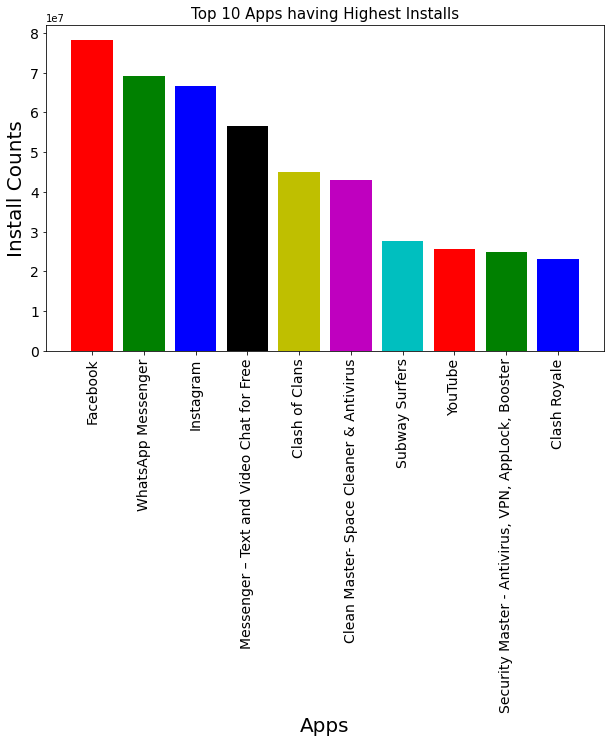

In [18]:
plt.rcParams['figure.figsize']=(10,6)
plt.bar("App", "Installs", data = top10, color = list('rgbkymc'))
plt.xticks(rotation = 90)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.xlabel("Apps", fontsize = 20)
plt.ylabel("Install Counts", fontsize = 20)
plt.title("Top 10 Apps having Highest Installs", fontsize = 15)
plt.show()

### Top 10 App having largest number of reviews given by the users

In [19]:
result = df1.groupby('App')['Reviews'].sum().reset_index()
topReview = result.sort_values(by = 'Reviews', ascending = False).head(10)

In [20]:
topReview

,App,Reviews
3432,Facebook,78158306
7665,WhatsApp Messenger,69119316
4422,Instagram,66577313
5096,Messenger – Text and Video Chat for Free,56642847
2073,Clash of Clans,44891723
2081,Clean Master- Space Cleaner & Antivirus,42916526
6807,Subway Surfers,27722264
7834,YouTube,25655305
6480,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
2070,Clash Royale,23133508


Here are the **Top 10 App** which are reviewed by the users and  **Facebook** app is heading the Top based on number of reviews.

#### Visualisation of Reviews of Top 10 Apps

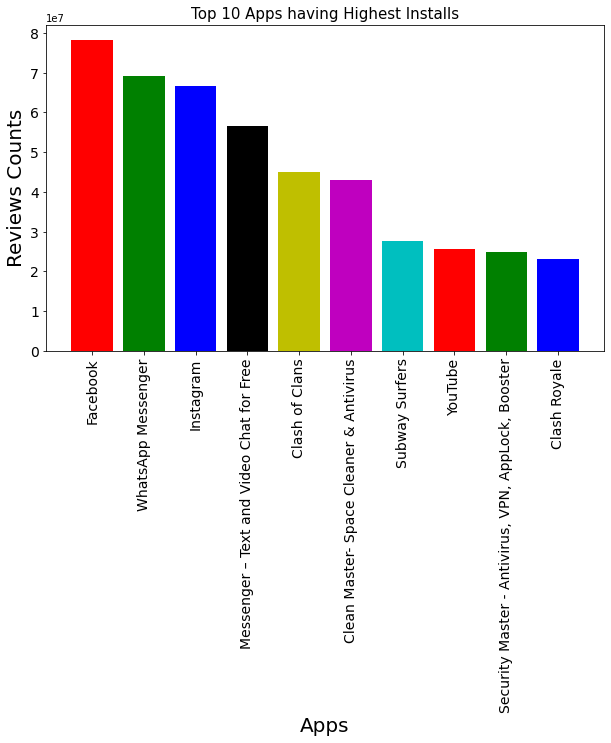

In [21]:
plt.rcParams['figure.figsize']=(10,6)
plt.bar("App", "Reviews", data = topReview, color = list('rgbkymc'))
plt.xticks(rotation =90)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.xlabel("Apps", fontsize = 20)
plt.ylabel("Reviews Counts", fontsize = 20)
plt.title("Top 10 Apps having Highest Installs",fontsize = 15)
plt.show()

### Most Popular Category

In [22]:
cat = df1.groupby('Category')['Installs'].sum().reset_index()
MostPopCat = cat.sort_values(by = 'Installs', ascending = False)

In [23]:
MostPopCat.head(10)

,Category,Installs
14,GAME,622295937
6,COMMUNICATION,285810907
29,TOOLS,229355702
27,SOCIAL,227927470
11,FAMILY,143822304
24,PHOTOGRAPHY,105351227
31,VIDEO_PLAYERS,67484072
25,PRODUCTIVITY,55590391
23,PERSONALIZATION,53542755
26,SHOPPING,44551541


Here are the **top 10** category which are mostly installed by the users.Where **Category: GAMES** comes on Top.

#### Distribution of Most popular category

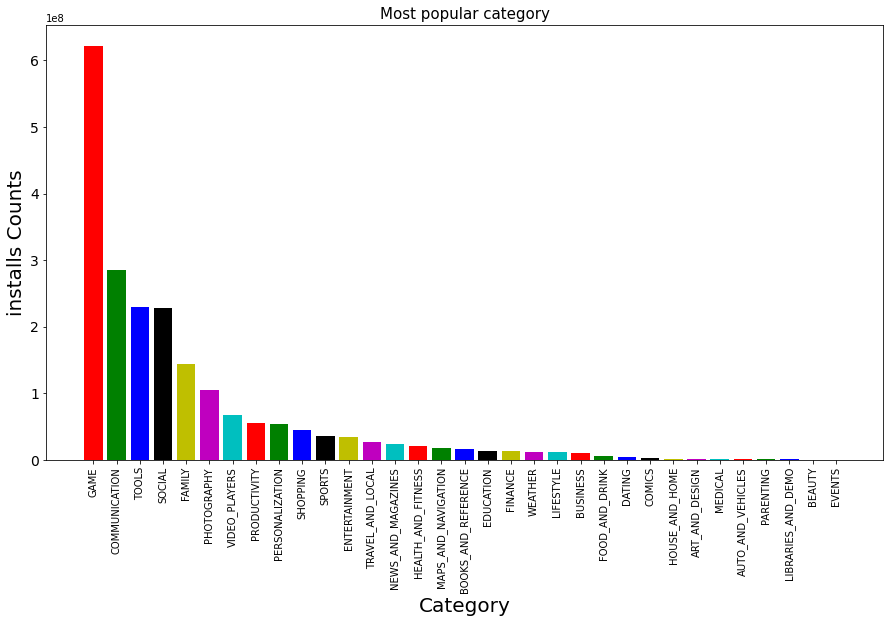

In [24]:
plt.rcParams['figure.figsize']=(15,8)
plt.bar("Category", "Installs", data = MostPopCat,color = list('rgbkymc'))
plt.xticks(rotation = 90)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 10)
plt.xlabel("Category", fontsize = 20)
plt.ylabel("installs Counts", fontsize = 20)
plt.title("Most popular category",fontsize = 15)
plt.show()

### Most Reviewed Categogy

In [25]:
MostRevCat = df1.groupby('Category')['Reviews'].sum().reset_index().sort_values(by = 'Reviews', ascending = False)

In [26]:
MostRevCat.head(10)

,Category,Reviews
14,GAME,622295937
6,COMMUNICATION,285810907
29,TOOLS,229355702
27,SOCIAL,227927470
11,FAMILY,143822304
24,PHOTOGRAPHY,105351227
31,VIDEO_PLAYERS,67484072
25,PRODUCTIVITY,55590391
23,PERSONALIZATION,53542755
26,SHOPPING,44551541


Here are the **top 10** category based on most reviewes given by the users.Where **Category: GAMES** comes on Top.

#### Distribution of Most reviewed category

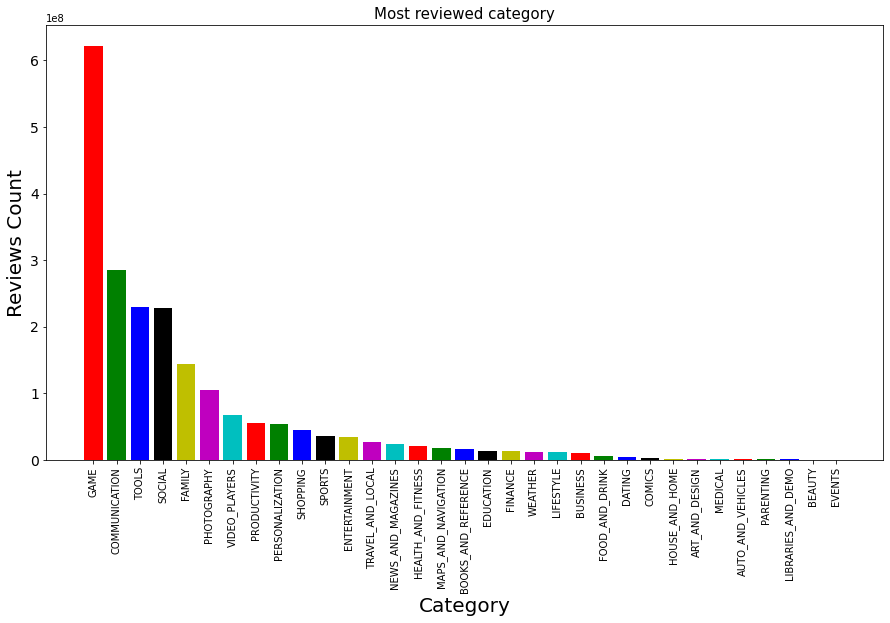

In [27]:
plt.rcParams['figure.figsize']=(15,8)
plt.bar("Category", "Reviews", data = MostRevCat,color = list('rgbkymc'))
plt.xticks(rotation = 90)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 10)
plt.xlabel("Category", fontsize = 20)
plt.ylabel("Reviews Count", fontsize = 20)
plt.title("Most reviewed category",fontsize = 15)
plt.show()

### Number of free apps

In [28]:
freeApps = len(df1[df1['Type'] == 'Free'])
print("No. of free apps = ", freeApps)

No. of free apps =  7592


We ovserve that **7,592 (~92.6%)** apps are free which have been installed by the users from Google Play Store data.

### Number of paid apps

In [29]:
paidApps = len(df1[df1['Type'] == 'Paid'])
print("No. of paid apps = ", paidApps)

No. of paid apps =  604


### Free vs Paid apps distribution

In [30]:
FreeOrPaid = df1.groupby('Type')['Installs'].sum().reset_index()

In [31]:
FreeOrPaid

,Type,Installs
0,Free,2085445686
1,Paid,6595368


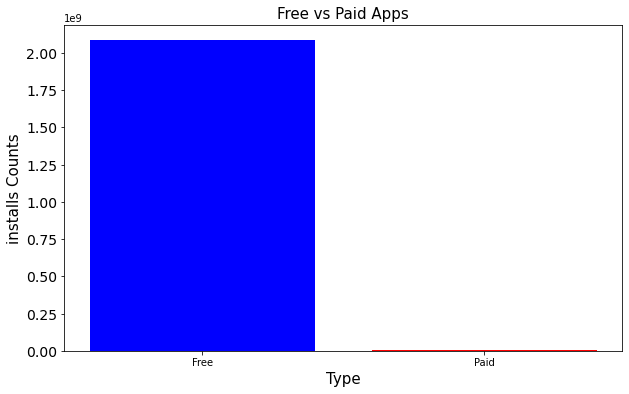

In [32]:
plt.rcParams['figure.figsize']=(10,6)
plt.bar("Type", "Installs", data = FreeOrPaid,color = list('br'))
plt.xticks(rotation = 0)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 10)
plt.xlabel("Type", fontsize = 15)
plt.ylabel("installs Counts", fontsize = 15)
plt.title("Free vs Paid Apps",fontsize = 15)
plt.show()

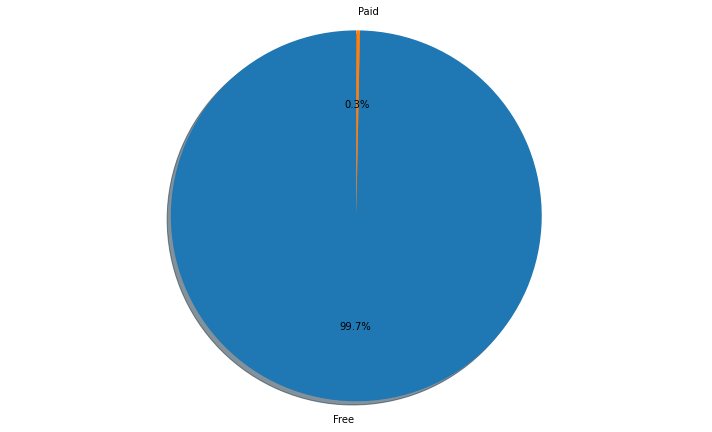

In [33]:
labels = ['Free', 'Paid']
sizes = [2085445686, 6595368 ]  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### Distribution of Content Rating

We look at Content Rating distribution based on user's **Age Group**

In [34]:
Dist=df1.groupby('Content Rating')['Installs'].sum().reset_index().sort_values(by = 'Installs', ascending = False)

In [35]:
Dist

,Content Rating,Installs
1,Everyone,1300302717
4,Teen,503290500
2,Everyone 10+,201327846
3,Mature 17+,87037457
0,Adults only 18+,81348
5,Unrated,1186


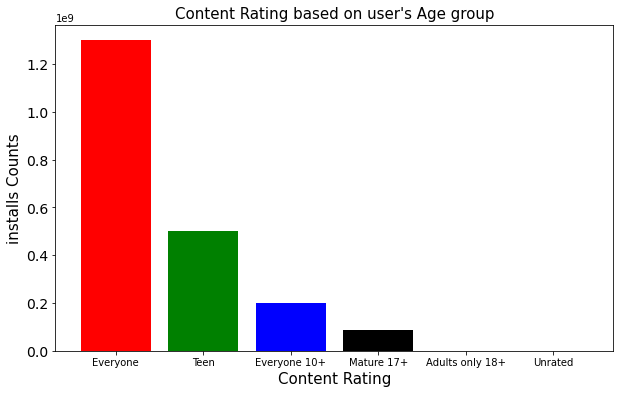

In [36]:
plt.rcParams['figure.figsize']=(10,6)
plt.bar("Content Rating", "Installs", data = Dist,color = list('rgbkymc'))
plt.xticks(rotation = 0)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 10)
plt.xlabel("Content Rating", fontsize = 15)
plt.ylabel("installs Counts", fontsize = 15)
plt.title("Content Rating based on user's Age group",fontsize = 15)
plt.show()

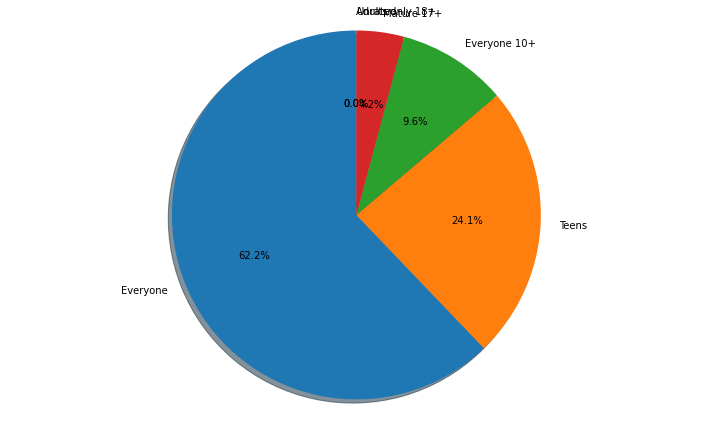

In [37]:
labels = ['Everyone', 'Teens', 'Everyone 10+', 'Mature 17+','Adults only 18+','Unrated']
sizes = [1300302717, 503290500,201327846, 87037457,81348, 1186 ]  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### Distribution of Genres based on number of installs per genres

In [38]:
Genr=df1.groupby('Genres')['Installs'].sum().reset_index().sort_values(by = 'Installs', ascending = False)

In [39]:
Genr

,Genres,Installs
33,Communication,285810907
104,Tools,229013366
97,Social,227927470
0,Action,150947146
24,Casual,130674741
...,...,...
107,Travel & Local;Action & Adventure,890
84,Puzzle;Education,834
32,Comics;Creativity,516
19,Books & Reference;Education,471


We observe that **Genres:Communication** is on Top and **Genres: Board;Pretend Play** is Least Installed Genres by Users.

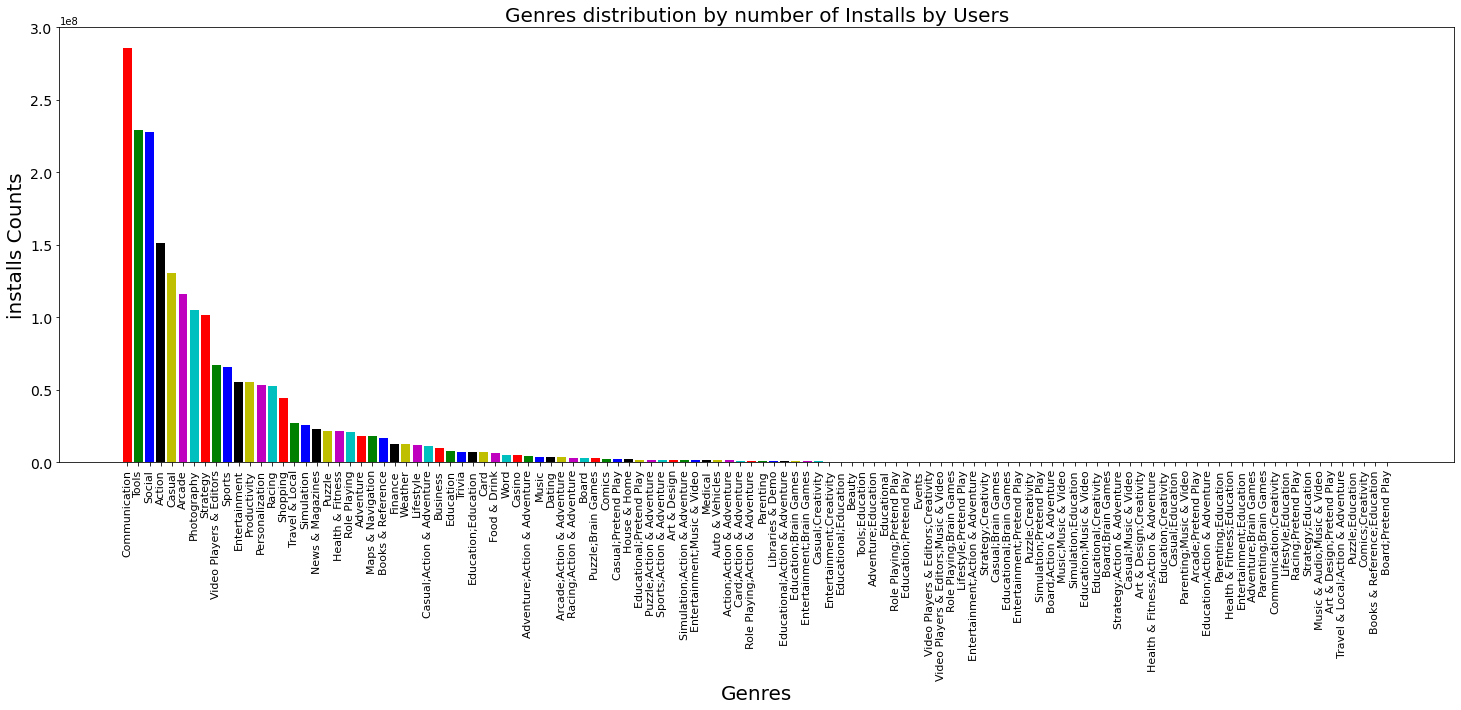

In [40]:
plt.rcParams['figure.figsize']=(25,8)
plt.bar("Genres", "Installs", data = Genr,color = list('rgbkymc'))
plt.xticks(rotation = 90)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 11)
plt.xlabel("Genres", fontsize = 20)
plt.ylabel("installs Counts", fontsize = 20)
plt.title("Genres distribution by number of Installs by Users",fontsize = 20)
plt.show()

The plot is **Right Skewed**.

### Distribution of relation between Category & Ratings

We look at the relation between Category and Rating.

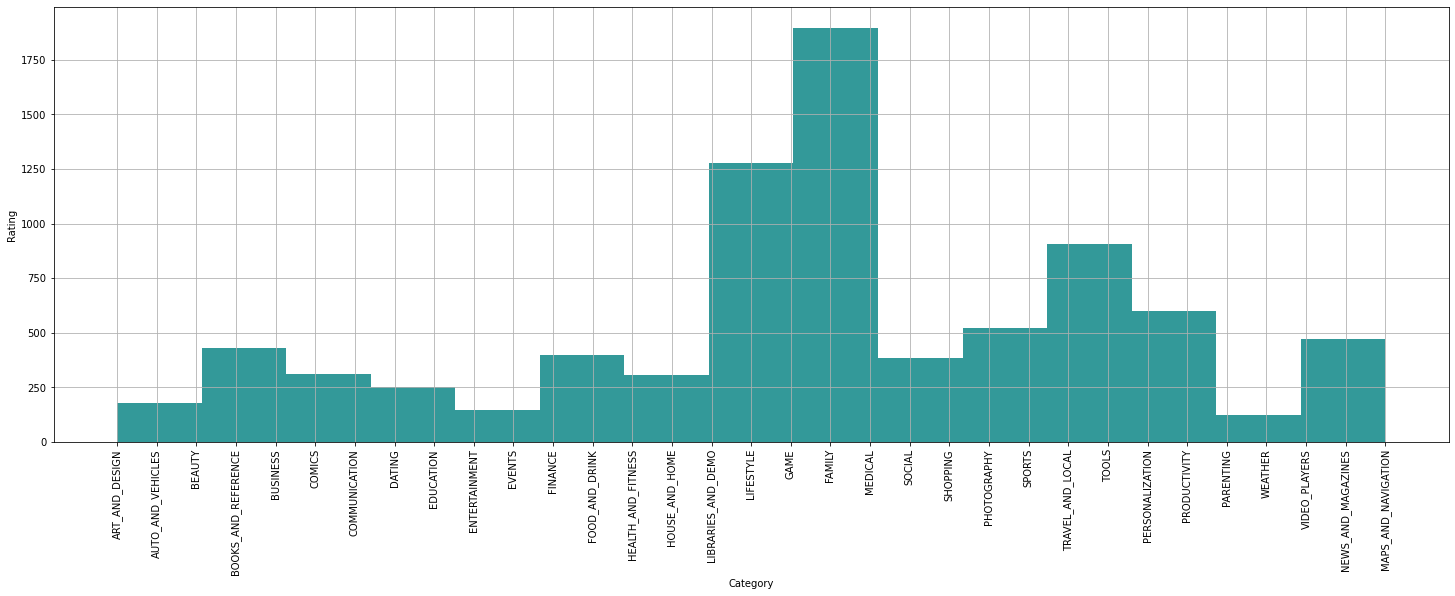

In [41]:
ax = df1["Category"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='Category', ylabel='Rating')
plt.xticks(rotation = 90)
plt.show()

We observe that **FAMILY** & **MEDICAL** are the top rated category by the users.